# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/FullCode_Learner/foodhub_order.csv')
# returns the first 5 rows
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
rows = len(df.axes[0])
print("Number of rows are: " + str(rows))
columns = len(df.axes[1])
print("Number of columns are: " + str(columns))

Number of rows are: 1898
Number of columns are: 10


#### Observations:
Number of rows are:1898
Number of columns are:9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
order_id, customer_id, food_preparation_time,delivery_time are integers    
restaurant_name, cuisine_type, day_of_the_week, rating is string datatype  
cost_of_the_order is a float datatype

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isna().values.any()

False

#### Observations:
There are no NULL values in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minumum time it takes to prepare an order is 20 mins
The Average time it takes to prepare an order is 27 mins
The maximum time it takes to prepare an order is 35 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
There are 736 orders that have not been given a rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

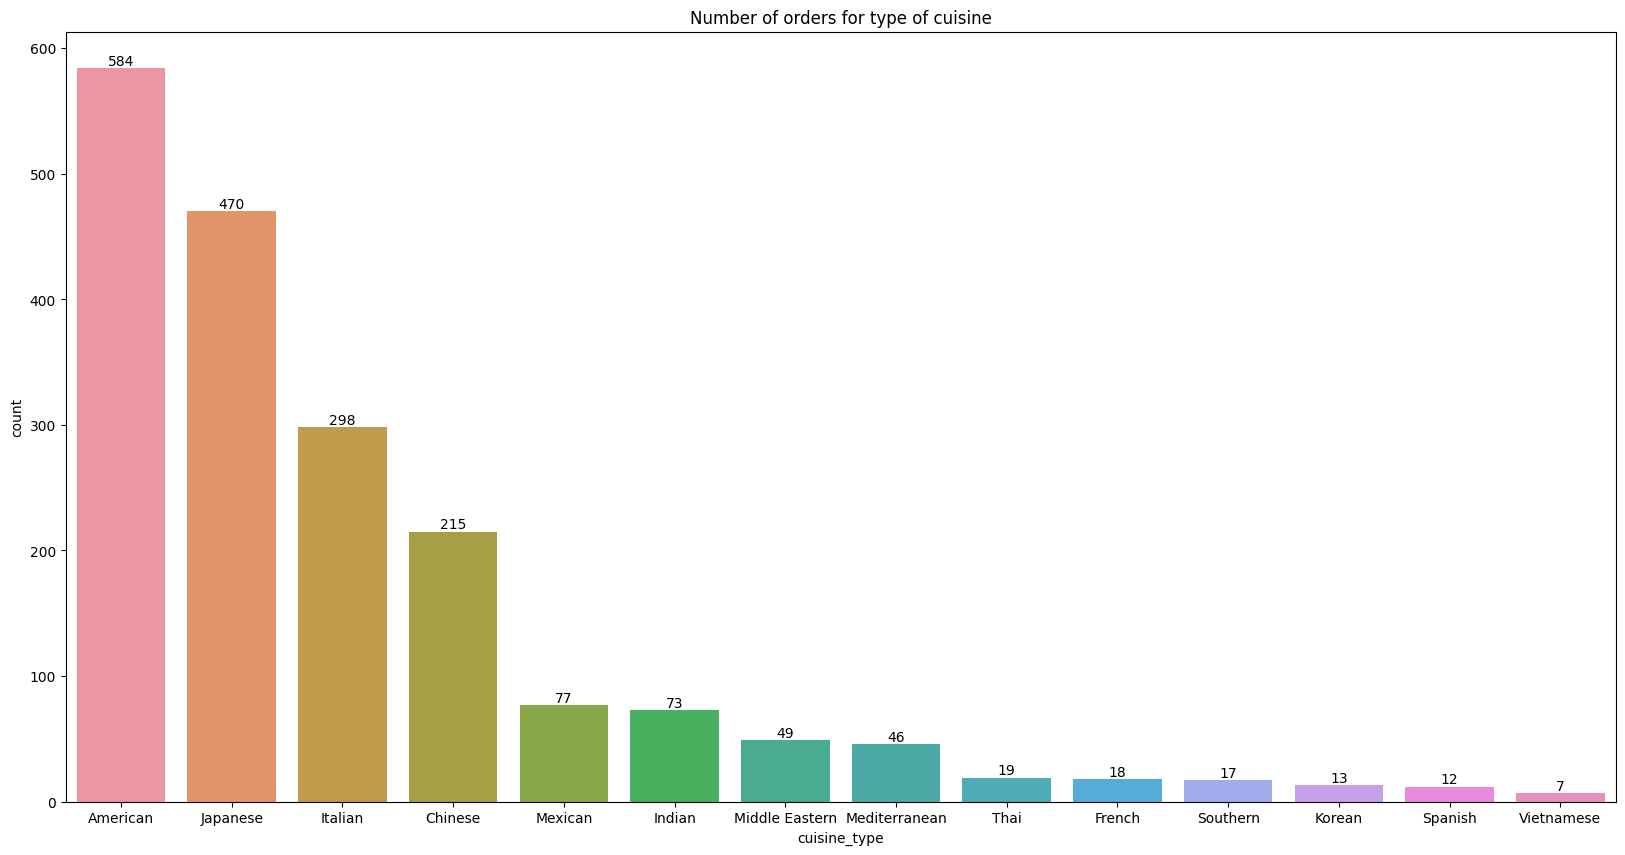

In [ ]:
# Write the code here
plt.figure(figsize=(20,10))
plt.title('Number of orders for type of cuisine')
plt.ylabel('Number of orders')
x = sns.countplot(data=df, x='cuisine_type', order = df['cuisine_type'].value_counts().index)
x.bar_label(x.containers[0])
plt.show()
# df.head()

#### Observations:
American Type cuisine has the most orders followed by Japanese and Italian

[Text(0, 0, '1351'), Text(0, 0, '547')]

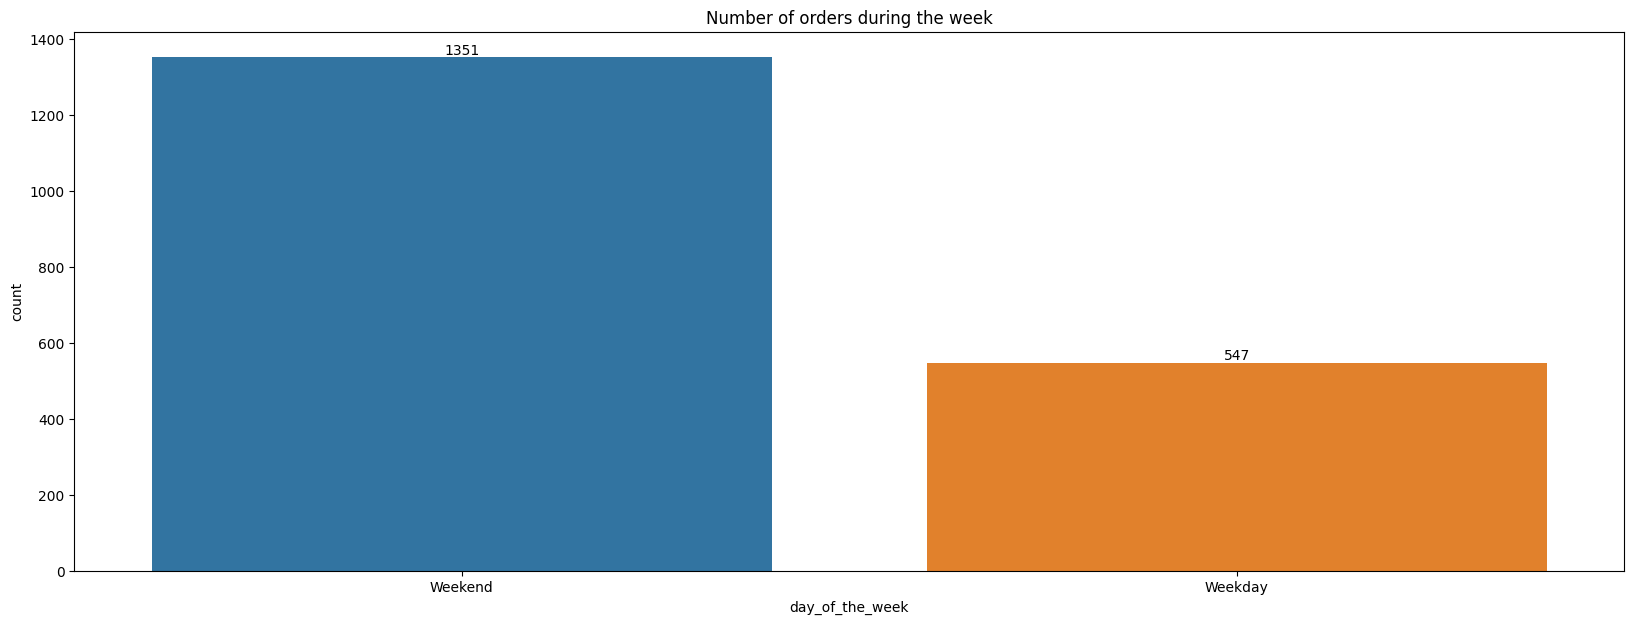

In [ ]:
from re import X
plt.figure(figsize=(20,7))
plt.title('Number of orders during the week')
plt.ylabel('Count of Orders')
x = sns.countplot(data=df, x='day_of_the_week')
x.bar_label(x.containers[0])

#### Observations:
Most of the orders are placed on the weekends

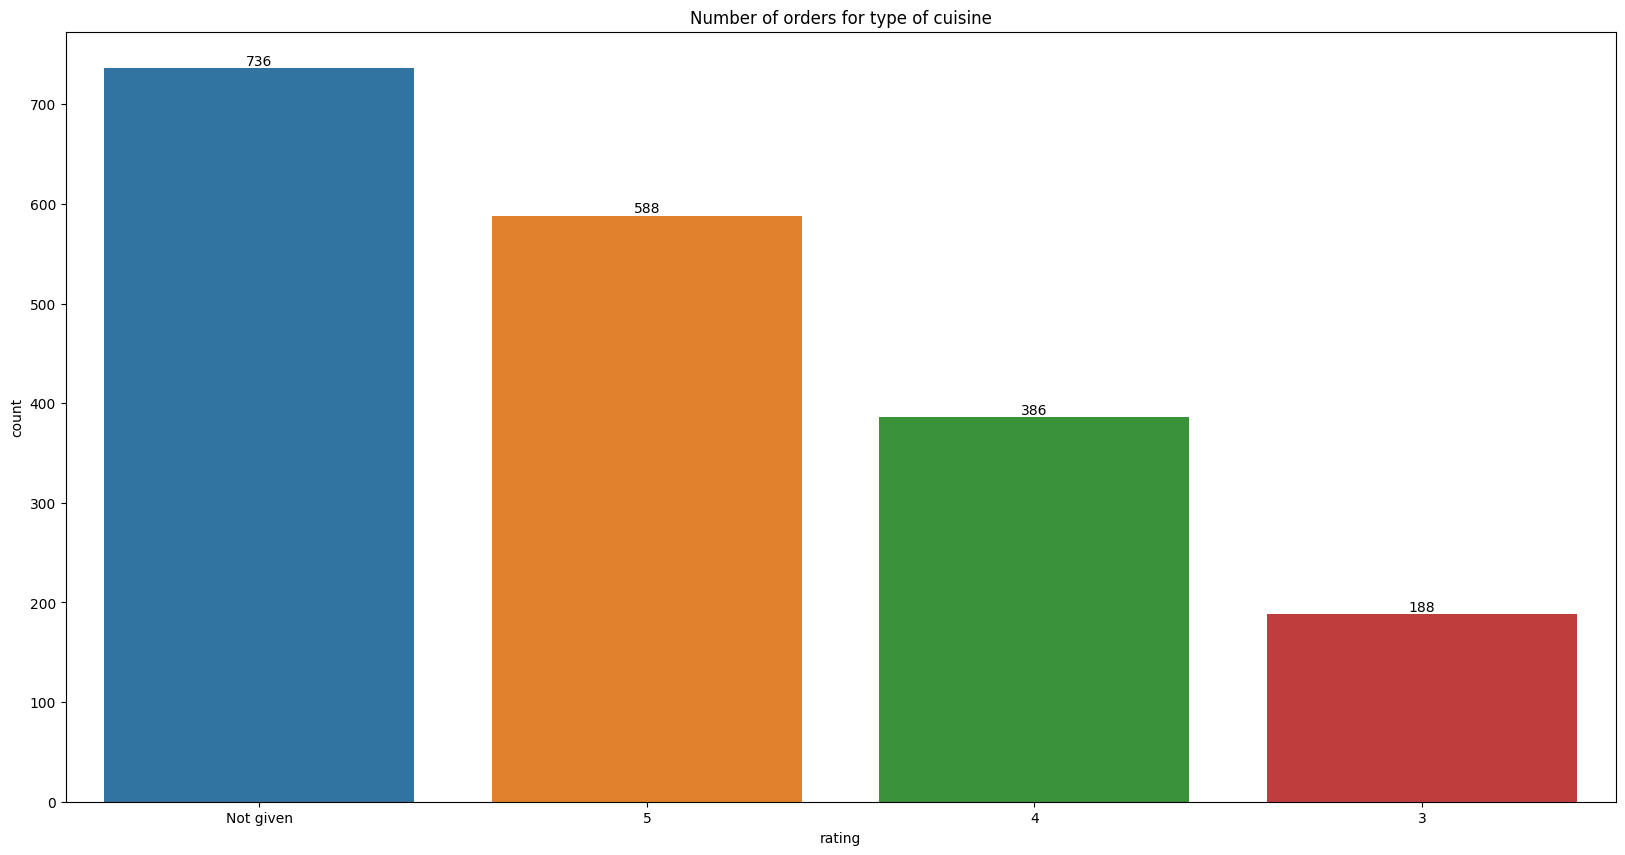

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Number of orders by the rating')
plt.ylabel('Number of orders')
x = sns.countplot(data=df, x='rating', order = df['rating'].value_counts().index)
x.bar_label(x.containers[0])
plt.show()

#### Observations:
There are 736 orders that have not received a rating and there are no orders that have received a rating of 1 or 2

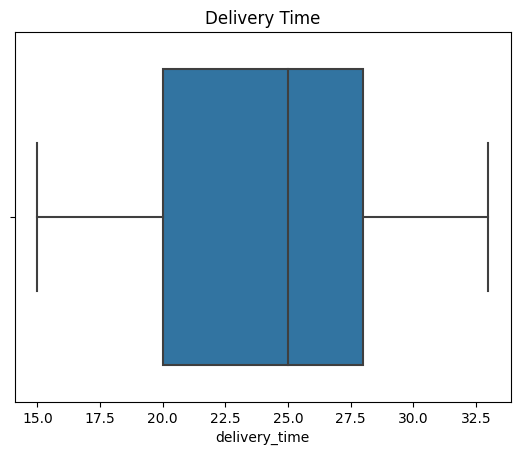

In [ ]:
# plt.figure(figsize=(20,10))
plt.title('Delivery Time')
sns.boxplot(data=df, x='delivery_time')
plt.show()

#### Observations:
The above boxplot is a Negatively skewed
75% of the orders have a delivery time ~28 mins

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df.groupby('restaurant_name')['order_id'] \
  .count() \
  .reset_index(name='count')\
  .sort_values(['count'],ascending = False)\
  .head(5)

,restaurant_name,count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


#### Observations:
The top 5 restaurants with most number of orders recevied are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
weekend_df = df.query("day_of_the_week == 'Weekend'")
weekend_df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [ ]:
weekend_df.groupby('cuisine_type')['order_id'].count().sort_values(ascending = False).head(1)

cuisine_type
American    415
Name: order_id, dtype: int64

#### Observations:
American cuisine is the most popular on the weekends with 415 orders


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
total_orders = len(df['order_id'])
print(total_orders)
orders_greater_than_20 = len(df[df['cost_of_the_order']>20]['order_id'])
print(orders_greater_than_20)

1898
555


In [ ]:
Percentage_order = orders_greater_than_20/total_orders *100
Percentage_order

29.24130663856691

#### Observations:
29% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417


#### Observations:
24.16 is the mean order delivery time


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df.groupby('customer_id')['order_id'] \
  .count() \
  .reset_index(name='number of orders')\
  .sort_values(['number of orders'],ascending = False)\
  .head(3)

,customer_id,number of orders
116,52832,13
84,47440,10
333,83287,9


#### Observations:
Customer Id '52832', '47440' and '83287' are the 3 most frequent customers

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Figure size 500x500 with 0 Axes>

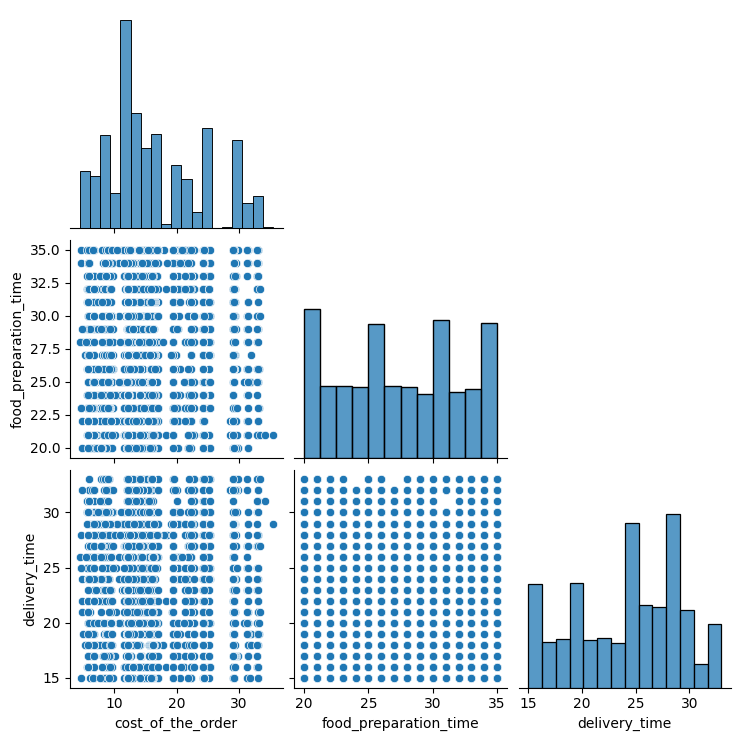

In [ ]:
# Write the code here
plt.figure(figsize=(5,5))
sns.pairplot(data=df[['cost_of_the_order','food_preparation_time','delivery_time']],corner=True)
# df.head()

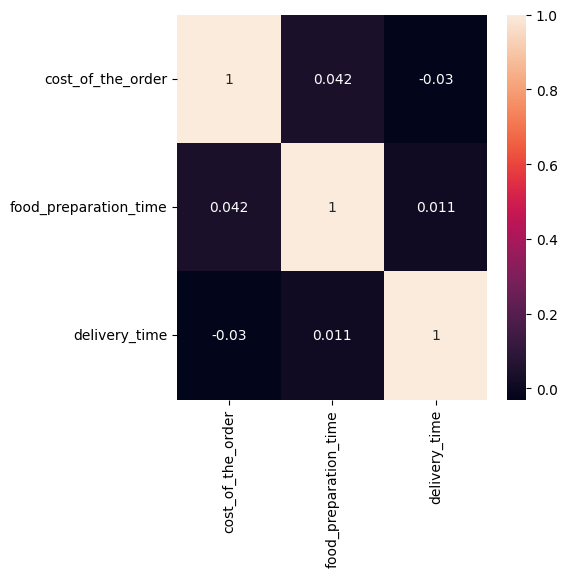

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot= True);


#### Observations:


There is no corelation between the numerical variables in the dataset

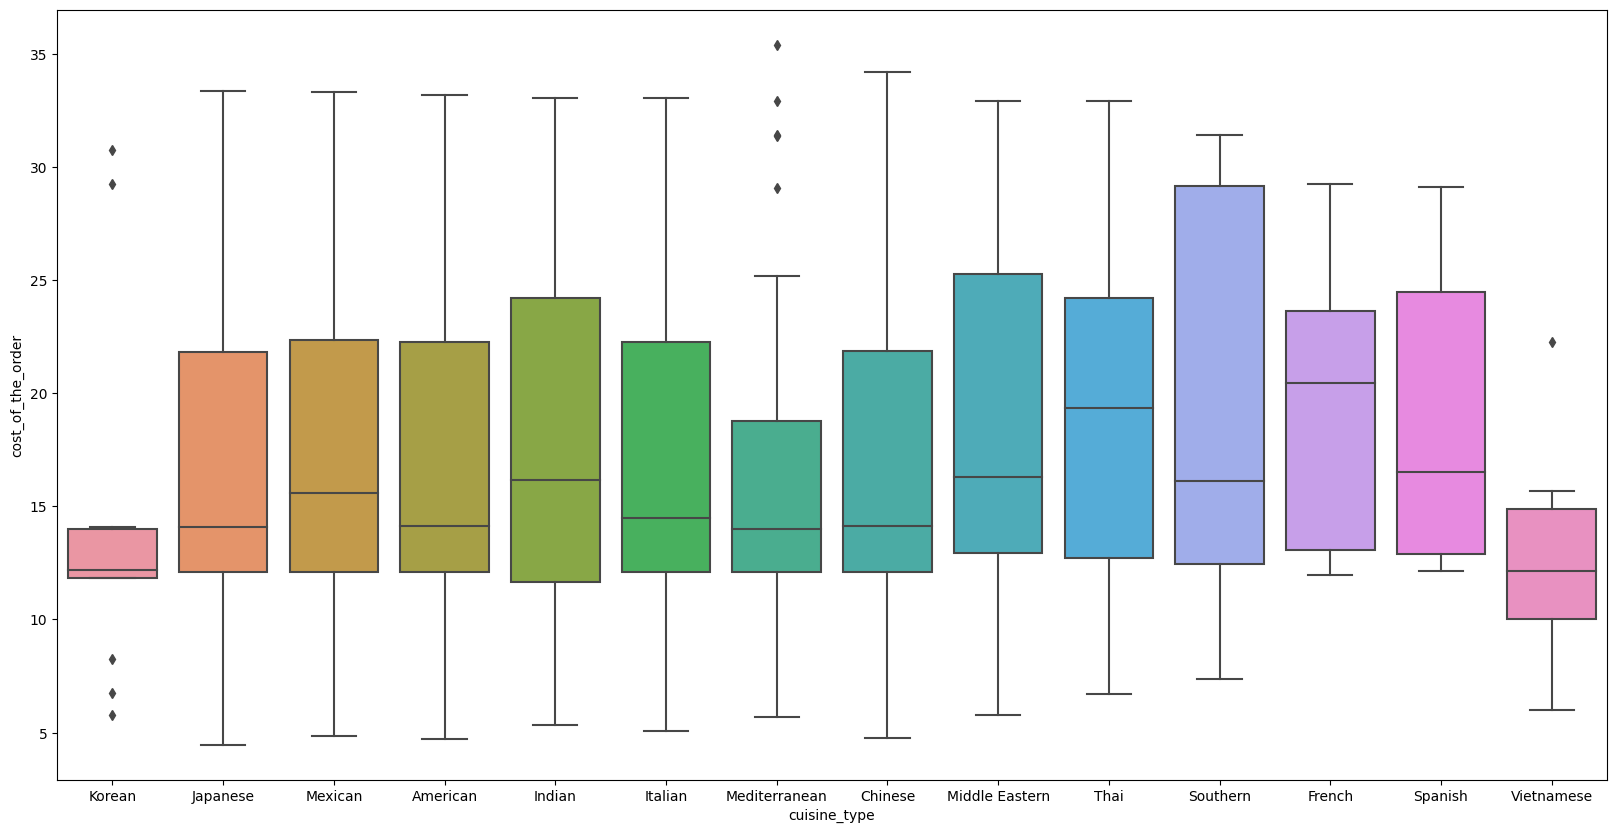

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x ='cuisine_type' , y='cost_of_the_order');

#### Observations:
Southern food has a lot of variance when it comes to cost of the order
Korean food has the least variance meaning the cost of the food is in the same ball park.
French cuisine has a very high median price of the food and hence expensive
There are a few outliers in Korean, Mediterranean and Vietnamese cuisine

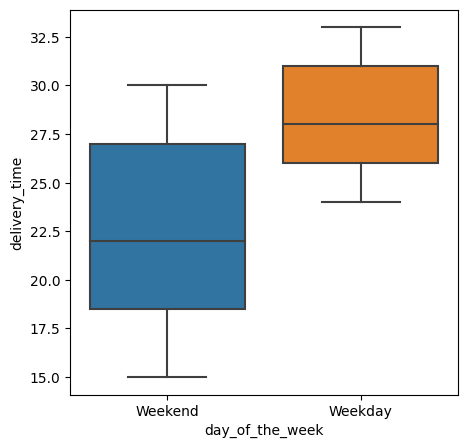

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x ='day_of_the_week' , y='delivery_time');

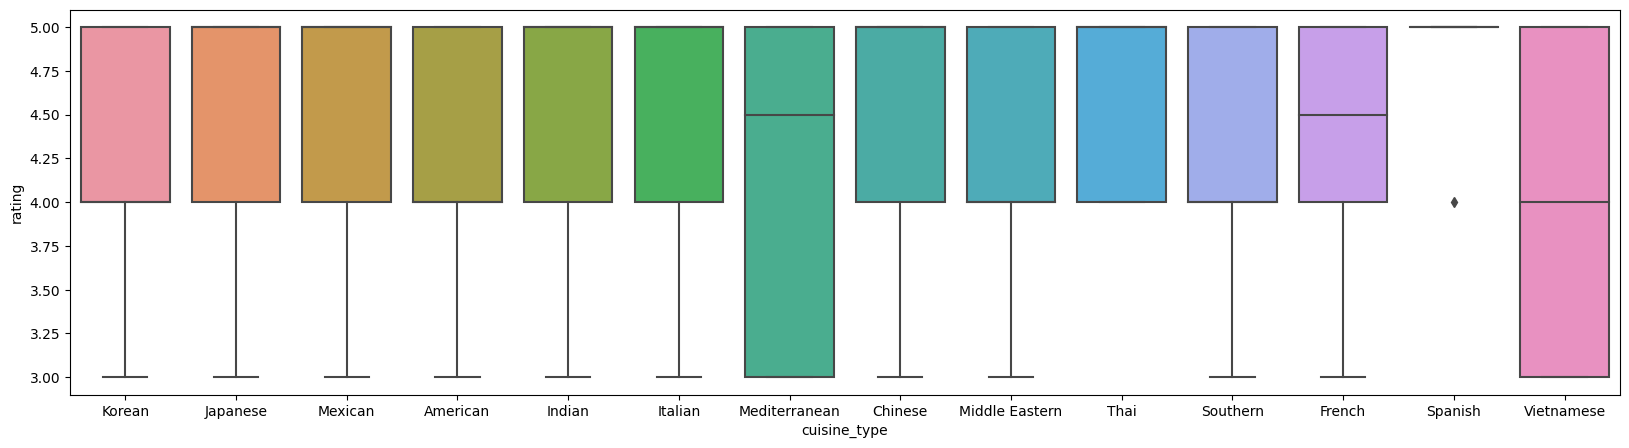

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x ='cuisine_type' , y='rating');

#### Observations:
Mediterranean(mean =4.5) and Vietnamese cusines(4.5) have a large variance(3-5) in their rating.

The delivery time for Weekday is much higher compared to Weekend

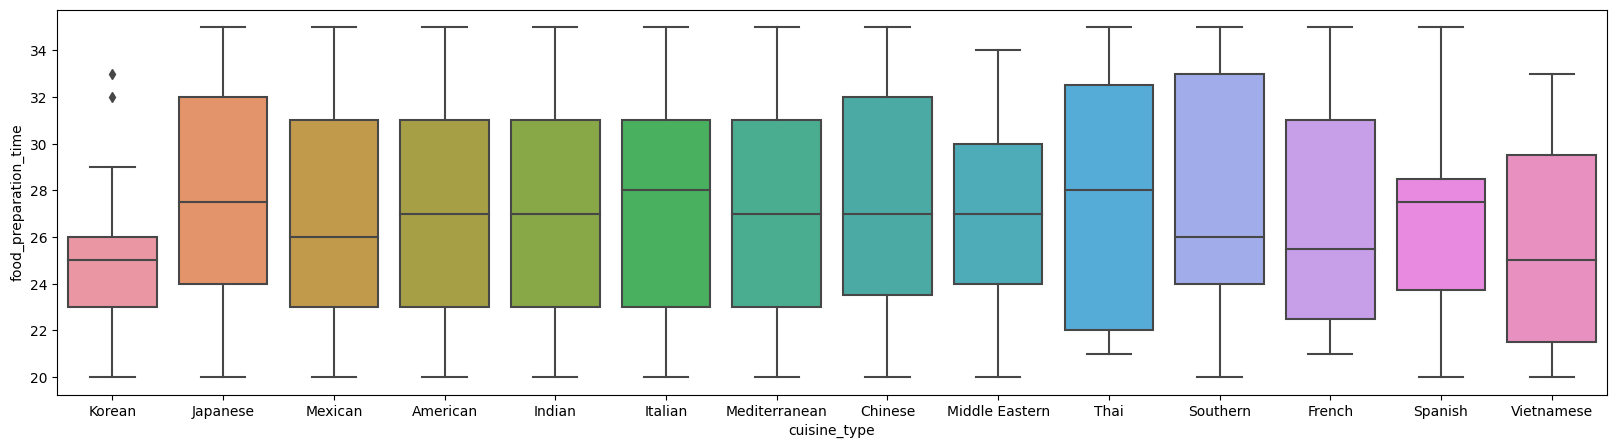

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x = 'cuisine_type', y ='food_preparation_time');

#### Observations:
The Median food preparation time is higher for Italian and Thai food

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0).astype(int)
df['rating'].replace(0, np.nan, inplace=True)
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,54


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# rating_count = df.loc['']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# # Write the code here
top_df = df.groupby('restaurant_name')['rating'] \
  .count() \
  .reset_index(name='rating_count')\
  .sort_values(['rating_count'],ascending = False)

top_50_df = top_df[top_df['rating_count'] > 50]
top_50_df


# df = df.groupby('restaurant_name').agg({'restaurant_name':'count', 'rating':'mean'}).rename(columns={'restaurant_name':'count','rating':'mean_sent'})


,restaurant_name,rating_count
136,Shake Shack,133
153,The Meatball Shop,84
21,Blue Ribbon Sushi,73
20,Blue Ribbon Fried Chicken,64


In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0).astype(int)
df['rating'].replace(0, np.nan, inplace=True)
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31


In [ ]:
mean_df = df.groupby('restaurant_name')['rating'] \
  .mean() \
  .reset_index(name='avg_rating')\
  .sort_values(['avg_rating'],ascending = False)
rating_avg_df = mean_df.query("avg_rating>4")

rating_avg_df

,restaurant_name,avg_rating
0,'wichcraft,5.000000
120,Ravagh Persian Grill,5.000000
37,Chola Eclectic Indian Cuisine,5.000000
38,Chote Nawab,5.000000
82,Junoon,5.000000
...,...,...
30,Cafe Mogador,4.153846
176,ilili Restaurant,4.153846
109,Parm,4.128205
125,Rubirosa,4.125000


In [ ]:
merged_df = pd.merge(rating_avg_df,top_50_df, how='inner', on ='restaurant_name')
# merged_df.query("count_of_rating > 50")
merged_df


,restaurant_name,avg_rating,rating_count
0,The Meatball Shop,4.511905,84
1,Blue Ribbon Fried Chicken,4.328125,64
2,Shake Shack,4.278195,133
3,Blue Ribbon Sushi,4.219178,73


###Observations
Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi are the restaurants that have avg rating greater than 4 and rating >50

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
df['restaurant_name'].nunique()

178

In [ ]:
# Write the code here
#Restaurants having cost greater than 20$
rs_20_df = df.groupby('restaurant_name')['cost_of_the_order'] \
  .sum() \
  .reset_index(name='cost of orders')\
  .sort_values(['cost of orders'],ascending = False)
final_20_df = rs_20_df[rs_20_df['cost of orders'] > 20]
final_20_df['New_cost'] = final_20_df['cost of orders'] + (final_20_df['cost of orders'] *.25 )
final_20_df



<ipython-input-94-3412570c43bf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_20_df['New_cost'] = final_20_df['cost of orders'] + (final_20_df['cost of orders'] *.25 )


,restaurant_name,cost of orders,New_cost
136,Shake Shack,3579.53,4474.4125
153,The Meatball Shop,2145.21,2681.5125
21,Blue Ribbon Sushi,1903.95,2379.9375
20,Blue Ribbon Fried Chicken,1662.29,2077.8625
109,Parm,1112.76,1390.9500
...,...,...,...
117,Posto,24.25,30.3125
113,Philippe Chow,24.20,30.2500
26,Bukhara Grill,23.72,29.6500
105,Olive Garden,22.84,28.5500


In [ ]:
#Restaurants having cost greater than 5$
rs_5_df = df.groupby('restaurant_name')['cost_of_the_order'] \
  .sum() \
  .reset_index(name='cost of orders')\
  .sort_values(['cost of orders'],ascending = False)
final_5_df = rs_5_df[(rs_5_df['cost of orders'] > 5) & (rs_5_df['cost of orders']<= 20)]
final_5_df['New_cost'] = final_5_df['cost of orders'] + (final_5_df['cost of orders'] *.15 )
final_net_rev_df = final_20_df['New_cost'].sum() + final_5_df['New_cost'].sum()
final_net_rev_df

<ipython-input-97-f36fc1b9676c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_5_df['New_cost'] = final_5_df['cost of orders'] + (final_5_df['cost of orders'] *.15 )


39090.235

#### Observations:
The net revenue is: 39,090

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
#Restaurants having cost greater than 20$
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [ ]:
#Adding new column to the dataset
df['Total_Time']= df['food_preparation_time'] + df['delivery_time']
df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


In [ ]:
#Delivery time >60 and calculating %
new_df = df.query("Total_Time > 60")
new_df['order_id'].count() /df['order_id'].count()*100

10.537407797681771

#### Observations:
10% of the orders take more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
del_df = pd.DataFrame(df.groupby('day_of_the_week')['delivery_time'].mean('delivery_time').reset_index(name = 'delivery_time'))
del_df

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

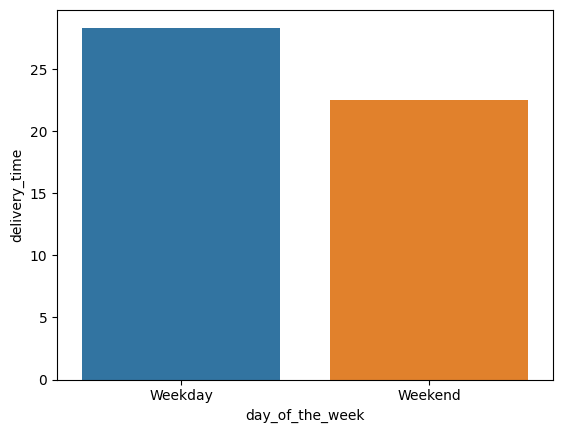

In [ ]:
sns.barplot(del_df, x='day_of_the_week', y='delivery_time')

#### Observations:
Mean is higher for weekday compared to Weekend




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American cuisine has the most number of orders placed
*  We observed ~40% of the ratings were not given to restaurants
*  Most number of orders are placed over the weekend mean delivery time is higher for weekdays.
*  We also observed a few outliers in Korean, Mediterranean and Vietnamese cuisine meaning some of the items are very expensive for these cuisines


### Recommendations:

*  French cuisine has the highest mean cost of orders amongst other cuisines. The company can drive more revenue if they focus on this cuisine and should have a robust marketing strategy to target this space
* Most number of orders are placed for American cuisine followed by Japanese and Italian. The company should further expand and promote these cusinies on their platform.
* Also we should encourage customers provide rating to the orders as we observed ~40% of the orders were not rated. We could provide them some promotional offer of some kind.
* Mediterranean and Vietnamese are the only cusines that have a large variance(3-5) in their rating. We can try to understand why some of the orders have received a below 4 rating.

---